In [168]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import warnings; warnings.simplefilter('ignore')

df = pd.read_csv('progresa_sample.csv.gz')

## Descriptive analysis

### Summary Statistics

In [184]:
summaryDF = df[df.columns.difference(['year', 'folnum','village'])]
summary = pd.DataFrame(index=summaryDF.columns)
summary['Mean'] = summaryDF.mean()
summary['STD'] = summaryDF.std()
summary['NumMissing'] = summaryDF.isnull().sum()
summary.index.name = "Variables"
print(summary)

                     Mean         STD  NumMissing
Variables                                        
age             11.366460    3.167744           0
dist_cap       147.674452   76.063134           0
dist_sec         2.418910    2.234109           0
fam_n            7.215715    2.352900           0
grc              3.963537    2.499063        6549
grc97            3.705372    2.572387           0
hohage          44.436717   11.620372          10
hohedu           2.768104    2.656106           0
hohsex           0.925185    0.263095          20
hohwag         586.985312  788.133664           0
indig            0.298324    0.457525         300
min_dist       103.447520   42.089441           0
poor                  NaN         NaN           0
progresa              NaN         NaN           0
sc               0.819818    0.384342        8453
sc97             0.813922    0.389172        3872
sex              0.512211    0.499854          24
welfare_index  690.346564  139.491130         210


### Differences at baseline

In [193]:
df97 = df[df['year'] == 97]
df97 = df97[df97.columns.difference(['year', 'folnum','village'])]
df97Poor = df97[df97['poor'] == 'pobre']
df97PoorTreatment = df97[df['progresa'] == 'basal']
df97PoorControl = df97[df['progresa'] == '0']
df97PoorTreatment = df97PoorTreatment[df97PoorTreatment.columns.difference(['poor','progresa'])]
df97PoorControl = df97PoorControl[df97PoorControl.columns.difference(['poor','progresa'])]

In [194]:
baseline = pd.DataFrame(index=df97PoorTreatment.columns)
baseline['Average value (Treatment villages)'] = df97PoorTreatment.mean()
baseline['Average value (Control villages)'] = df97PoorControl.mean()
baseline['Difference (Treat - Control)'] = baseline['Average value (Treatment villages)'] - baseline['Average value (Control villages)']
l = []
listofname = df97PoorTreatment.columns
for x in listofname:
    l.append(stats.ttest_ind(df97PoorTreatment[x],df97PoorControl[x], nan_policy='omit').pvalue)
baseline['p-value'] = l
baseline

,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
age,10.852229,10.889256,-0.037027,2.577952e-01
dist_cap,147.174637,148.475099,-1.300462,1.021567e-01
dist_sec,2.395930,2.455722,-0.059792,1.050891e-02
fam_n,7.202860,7.236309,-0.033449,1.741312e-01
grc,3.699075,3.715460,-0.016385,5.425787e-01
grc97,3.699075,3.715460,-0.016385,5.425787e-01
hohage,44.228760,44.769806,-0.541046,8.530957e-06
hohedu,2.798696,2.719097,0.079599,4.169096e-03
hohsex,0.926552,0.922994,0.003558,1.960796e-01
hohwag,576.529437,603.734434,-27.204997,9.664290e-04


### Interpretation

There are some variables in which there are statistically significant differnces between the treatments and control villages. It matter if there are differnces at baseline because when we say we are splitting into control and treatment vilalges we want to measure thhe effect of the treatment. If they are not the same at baseline, we cannot make concrete causal inferences. As mentioned above, it is harder to make causal inferences if both groups are not the same at baseline.

### Graphical exploration
level of household head education vs average enrollment rate in 1997

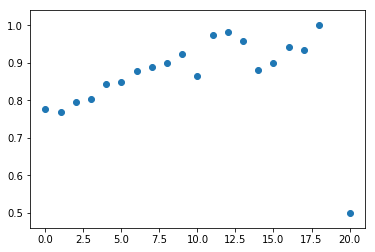

In [172]:
means = df97.groupby(["hohedu"])['sc'].mean()
meansdf = pd.DataFrame(means)
plt.scatter(meansdf.index.values, meansdf['sc'])
plt.show()

Except for the outlier at 20 years of Head of Household education, there seems to be a strong positive correlarion between  years of Head of Household education and whether or not a student is enrolled in school.

### Graphical exploration, part 2
Village enrollment rates before and after the treatment

In [173]:
df97 = df[df['year'] == 97]
df97Poor = df97[df97['poor'] == 'pobre']
df97PoorTreatment = df97[df['progresa'] == 'basal']
means97 = df97PoorTreatment.groupby(["village"])['sc'].mean()

df98 = df[df['year'] == 98]
df98Poor = df98[df98['poor'] == 'pobre']
df98PoorTreatment = df98[df['progresa'] == 'basal']
means98 = df98PoorTreatment.groupby(["village"])['sc'].mean()


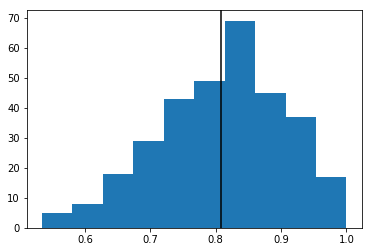

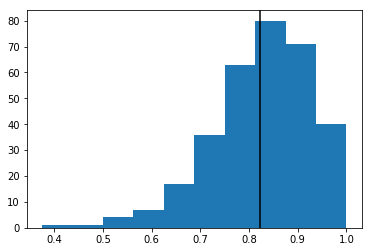

p-value: 0.0621248579597


In [190]:
plt.hist(means97)
plt.axvline(x=means97.mean(), color='k')
plt.show()

plt.hist(means98)
plt.axvline(x=means98.mean(), color='k')
plt.show()

print("p-value:", stats.ttest_ind(means97, means98, nan_policy='omit').pvalue)

The is definetely a visual differnce between the two graphs. We can clearly see that the bottom graph of 1998 is left tailed. If we were to look at the median instead of the mean, we would see more evidence of change. The bigger p-value tells us that it is not significant differnce.

## Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### Simple differences: T-test

In [175]:
df98 = df[df['year'] == 98]
df98Poor = df98[df['poor'] == 'pobre']
df98PoorTreatment = df98[df['progresa'] == 'basal']
means98PoorTreatment = df98PoorTreatment.groupby(["village"])['sc'].mean()

df98PoorControl = df98[df['progresa'] == '0']
means98PoorControl = df98PoorControl.groupby(["village"])['sc'].mean()

print("Treatment Mean:", means98PoorTreatment.mean())
print("Contol Mean:", means98PoorControl.mean())
print("p-value of t-test:" , stats.ttest_ind(means98PoorTreatment,means98PoorControl, nan_policy='omit').pvalue)

Treatment Mean: 0.8232620500045702
Contol Mean: 0.7990203932596827
p-value of t-test: 0.00873006255438


The small p-value gives us reason to reject the null hypothesis that the two means are equal in favor of the alternative that they are not. This tells us that there is a differnce in the means which could have been caused by the treatment.

### Simple differences: Regression

In [176]:
df98 = df[df['year'] == 98]
df98Poor = df98[df['poor'] == 'pobre']
treatmentDummies = pd.get_dummies(df98Poor['progresa'])
df98Poor['treatmentDummy'] = treatmentDummies['basal']

In [177]:
lm = smf.ols(formula='sc ~ treatmentDummy', data=df98Poor).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           6.64e-17
Time:                        21:38:04   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8076      0.004    220.

2.3 Multiple Regression

In [178]:
lm = smf.ols(formula='sc ~ treatmentDummy + age + hohedu + indig + sex + dist_sec + welfare_index ', data=df98Poor).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Thu, 08 Feb 2018   Prob (F-statistic):               0.00
Time:                        21:38:05   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.5025      0.014    105.

### Difference-in-Difference, version 1 (tabular)

In [195]:
df97 = df[df['year'] == 97]
df97Poor = df97[df97['poor'] == 'pobre']
df97PoorTreatment = df97[df['progresa'] == 'basal']
means97PoorTreatment = df97PoorTreatment['sc'].mean()

df97PoorControl = df97[df['progresa'] == '0']
means97PoorControl = df97PoorControl['sc'].mean()

df98 = df[df['year'] == 98]
df98Poor = df98[df98['poor'] == 'pobre']
df98PoorTreatment = df98[df['progresa'] == 'basal']
means98PoorTreatment = df98PoorTreatment['sc'].mean()

df98PoorControl = df98[df['progresa'] == '0']
means98PoorControl = df98PoorControl['sc'].mean()

print("Change in Control: ", means98PoorControl - means97PoorControl)
print("Change in Treatment:", means98PoorTreatment - means97PoorTreatment )
print("Diff-in-Diff:", (means98PoorControl - means97PoorControl) - (means98PoorTreatment - means97PoorTreatment))

Change in Control:  -0.0036609043082972414
Change in Treatment: 0.02268638643289378
Diff-in-Diff: -0.02634729074119102


Here we show a smaller effect of (.026) than the above simple differences method. 
Again we assume that no other variables contribute to this.

###  Difference-in-Difference, version 2 (regression)

In [204]:
dfPoor = df[df['poor'] == 'pobre']
treatmentDummies = pd.get_dummies(dfPoor['progresa'])
yearDummies = pd.get_dummies(dfPoor['year'])
dfPoor["GotTreatment"] = treatmentDummies['basal']
dfPoor["Year98"] = yearDummies[98]
lm = smf.ols(formula='sc ~ GotTreatment * Year98 + age + hohedu + indig + sex + dist_sec + welfare_index ', data=dfPoor).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2488.
Date:                Sun, 11 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:10:29   Log-Likelihood:                -16656.
No. Observations:               58013   AIC:                         3.333e+04
Df Residuals:                   58003   BIC:                         3.342e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4711    